In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import random

In [33]:
# Define some initial params
# Dimensionality
Dn = 20

# Mutation probability
M = 0.1

# Population size
NP = 500

# No. of generations
G = 200

In [40]:
r = np.random.random((Dn,))
def f(x):
    return ((x - r)**4).sum()

print r

[0.33963114 0.96835895 0.78780315 0.34781664 0.10465496 0.08571888
 0.03963633 0.77674293 0.40063806 0.31718343 0.96762454 0.30273039
 0.73324343 0.56179786 0.43937181 0.54862555 0.95187542 0.17618916
 0.39517775 0.03050895]


In [41]:
# Generate population
pop = []

for ix in range(NP):
    # generate a random vector
    vec = np.random.uniform(-10, 10, (Dn,))
    
    # Add to population
    pop.append(vec)

print len(pop)

500


In [42]:
def crossover(parent_1, parent_2):
    child_1 = np.zeros(parent_1.shape)
    child_2 = np.zeros(parent_2.shape)
    
    dim = int(parent_1.shape[0] / 2.0)
    
    child_1[:dim] = parent_1[:dim]
    child_1[dim:] = parent_2[dim:]
    
    child_2[:dim] = parent_2[:dim]
    child_2[dim:] = parent_1[dim:]
    
    return child_1, child_2

def mutate(x):
    for ix in range(x.shape[0]):
        # Generate a random number for probability
        R = np.random.random()
        
        if R < M:
            # Mutate random index 
            x[ix] = np.random.uniform(-5, 5)
        else:
            pass
    return x

In [43]:
loss = []

# Main Genetic Algo loop
for gx in range(G):
    pop = sorted(pop, key=lambda z: f(z))
    print "Generation: {} | Best Value: {}".format(gx, f(pop[0]))
    loss.append(f(pop[0]))
    
    # create a temp population
    temp = []
    
    while not len(temp) == NP:
        # Select 2 parents from good section of population
        p1, p2 = random.sample(pop[:int(NP/2.0)], 2)
        
        # Apply crossover
        c1, c2 = crossover(p1, p2)
        
        # mutate
        c1 = mutate(c1)
        c2 = mutate(c2)
        
        temp.append(c1)
        temp.append(c2)
    
    # create a combined population
    comb = temp + pop
    
    # survival of the fittest
    pop = sorted(comb, key=lambda z: f(z))[:NP]

Generation: 0 | Best Value: 10027.3683719
Generation: 1 | Best Value: 5840.80326478
Generation: 2 | Best Value: 3279.94834211
Generation: 3 | Best Value: 1728.22161622
Generation: 4 | Best Value: 1670.89223223
Generation: 5 | Best Value: 1271.91800075
Generation: 6 | Best Value: 818.018975394
Generation: 7 | Best Value: 472.258421977
Generation: 8 | Best Value: 472.258421977
Generation: 9 | Best Value: 277.465909991
Generation: 10 | Best Value: 277.465909991
Generation: 11 | Best Value: 198.709567681
Generation: 12 | Best Value: 166.170050315
Generation: 13 | Best Value: 126.14721487
Generation: 14 | Best Value: 124.138969984
Generation: 15 | Best Value: 108.291702374
Generation: 16 | Best Value: 95.1422324977
Generation: 17 | Best Value: 83.592257878
Generation: 18 | Best Value: 64.4947020589
Generation: 19 | Best Value: 48.9689545697
Generation: 20 | Best Value: 38.2810312936
Generation: 21 | Best Value: 38.2810312936
Generation: 22 | Best Value: 30.1839762734
Generation: 23 | Best V

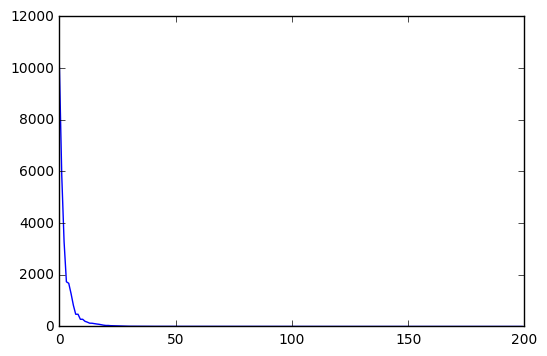

In [44]:
plt.plot(loss)

In [39]:
print pop[0], r

[0.72980353 0.39212368 0.94858407 0.90635826 0.59281614 0.72180315
 0.53078196 0.23163441 0.53106181 1.01404467 0.07825622 1.00308241
 0.22013548 0.03985361 0.48332024 0.40730114 0.50989349 0.73273302
 0.47738113 0.42123407] [0.79853794 0.27192868 0.92736443 0.84718697 0.70449648 0.70902484
 0.48623244 0.18143723 0.51320421 0.92209244 0.01504953 0.92000922
 0.26919143 0.00895479 0.52291437 0.51153883 0.49592158 0.81837798
 0.46843356 0.49645712]
